# Chapter 2 : Embedding Examples

## Representation learning 

**Representation learning**, also known as **network embedding**, aims to learn a mapping function  
*f*: 𝑮 → ℝⁿ that transforms a graph from its discrete form into a continuous, low-dimensional space.

The goal is for *f* to capture both **local** and **global** structural properties of the graph *G*.  
Once learned, this vector representation can serve as a feature input for downstream machine learning tasks.








 ![embedding](../images/chap1_1.png)



## Levels of Graph Representation Learning

Graph embedding techniques operate at different levels of granularity depending on the type of entity being represented: nodes, edges, or entire graphs. Below are three widely-used algorithms that reflect these levels:

---
## Node-level tasks

In Node-level tasks, the goal is to predict a feature or label for each individual node in a graph. These models utilize the graph’s structural information (i.e., the connections between nodes) to better understand and learn representations for each node.

For instance, in a social network, nodes represent users and edges represent relationships or interactions between them. A node-level task might be to predict whether a person belongs to a certain community, has a particular interest, or exhibits similar behavior to others.



### 🔹 Node2Vec – *Node-Level Embedding*

**Node2Vec** learns vector representations for individual nodes by simulating biased random walks. These embeddings capture both the local and global structure of the graph.

**Example**:  
In a social network, Node2Vec can learn feature vectors for users based on their connections. These vectors can be used for:
- Predicting friendships (link prediction)
- Identifying user roles (e.g., influencers, spammers)

![nodeLevel](../images/chap1_node.gif)
![nodeLevel](../images/chap1_2.png)



In [1]:
import matplotlib.pyplot as plt
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Node2Vec example

The Node2Vec embedding algorithm is then used in order to map each node of the graph in a vector of two dimensions.

it is easy to see that nodes that have a similar structure are close to each other and are distant from nodes that have dissimilar structures.

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.77it/s]


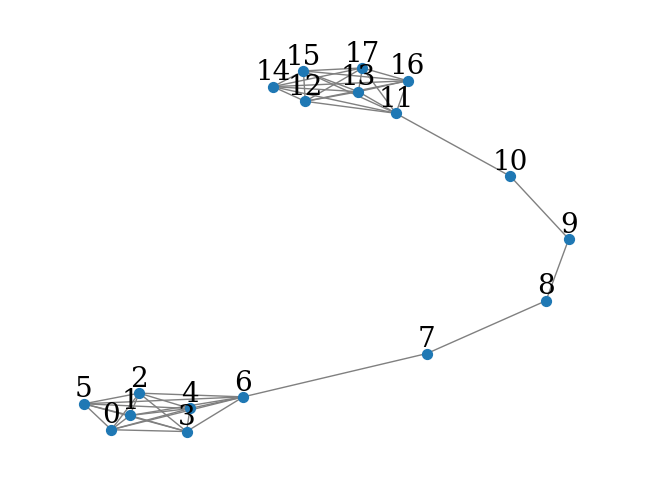

In [2]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=7, m2=4)
draw_graph(G, nx.spring_layout(G))

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
#model = node2vec.fit(vector_size=2, window=10, min_count=1, sg=1)

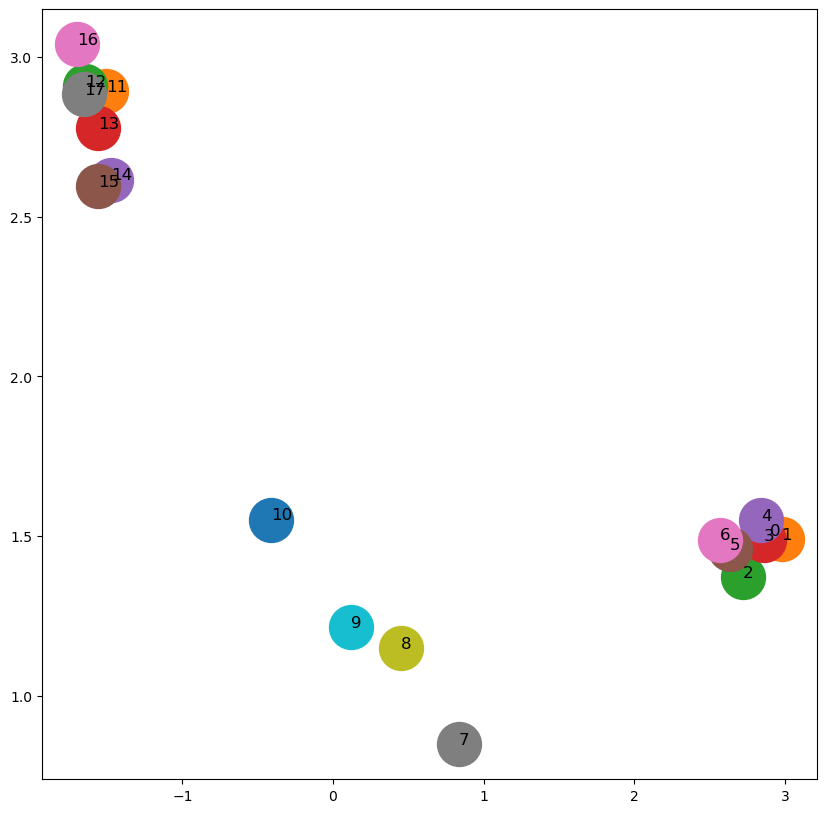

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv.get_vector(str(x)) #Word vectors include the feature vector (embedding) of each node.
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)



Graph learning models such as GCN (Graph Convolutional Network), GraphSAGE, or GAT (Graph Attention Network) can capture information from a node’s neighborhood and generate expressive embeddings. These embeddings are then used for classification, clustering, or regression on the nodes.

![nodeLevelExample](../images/chap1_6.png)
ref: https://distill.pub/2021/gnn-intro/


---
## Edge-level tasks
In Edge-level tasks, the goal is to predict a property or label for an edge (i.e., a connection) between two nodes in a graph. These tasks are essential in applications where analyzing or predicting relationships is important.

For instance, in a social network, one might want to
 - predict whether two people are likely to become friends in the future (link prediction), or
 - determine the type of relationship between two individuals (e.g., friendship, collaboration, or competition).

Graph learning models often **compute embeddings for each node, and then combine the embeddings of two connected nodes (using operations such as sum, product, or difference) to obtain a feature vector for the edge**, which can be used for prediction.


### 🔹 Edge2Vec – *Edge-Level Embedding*

Understanding Edge-Level Embedding through an Example:

Consider a graph representing a workplace network, where each node corresponds to an employee. Let's examine two edges:

- Edge A connects a manager to a developer.

- Edge B connects a different manager to a different developer.

Suppose the embeddings for Edge A and Edge B are very similar. This indicates that the relationship type—between a manager and a developer—is structurally or semantically meaningful and consistent across the graph.

✅ Conclusion:
When two edges have similar embeddings, it reflects a similarity in the patterns of interaction between their respective nodes. This can be used to analyze recurring relationship types, detect anomalies, or predict new potential links in the graph.

![nodeLevel](../images/chap1_3.png)


**Edge2Vec** generates embeddings for edges by combining the embeddings of the two endpoint nodes using binary operations such as:
- Hadamard product
- Average
- L1/L2 distance

**Example**:  
In a transaction network, Edge2Vec can be used to represent the interaction between users. These vectors help with:
- Fraud detection
- Anomaly detection in communications

On the left we have an initial graph built from the previous visual scene. On the right is a possible edge-labeling of this graph when some connections were pruned based on the model’s output.

![edgeLevel1](../images/chap1_edge.png)
![edgeLevel2](../images/chap1_edge2.png)

ref: https://distill.pub/2021/gnn-intro/

## Edge2Vec example

Another example on the same graph uses the Edge2Vec algorithm to generate vector representations for the edges. 

Specifically, the HadamardEmbedder is applied to the output of Node2Vec (keyed_vectors = model.wv) to map each edge into a two-dimensional vector space.

In [4]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

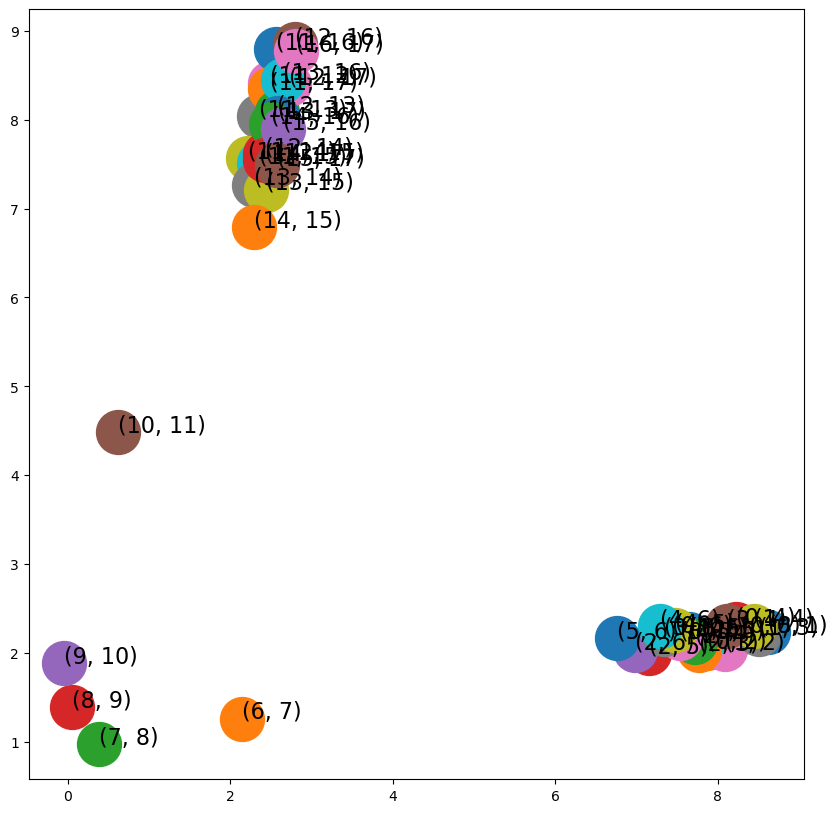

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

---
##  Graph-level tasks
In Graph-level tasks, the objective is to predict a global property or label for the entire graph. In these scenarios, each graph is treated as a single data instance.

For example, in the field of chemistry, a molecule can be represented as a graph where nodes are atoms and edges are chemical bonds. A graph-level task could be to predict whether the molecule has medicinal properties or what kind of smell it produces.

In these models, node embeddings are first computed, and then a global pooling operation (such as mean, sum, or attention-based pooling) is used to aggregate node features into a single vector representing the entire graph. This vector is then used for downstream predictions.


### 🔹 Graph2Vec – *Graph-Level Embedding*

**Graph2Vec** provides a single embedding for an entire graph. It treats each graph like a document composed of rooted subgraphs and applies ideas from Doc2Vec to learn its representation.

**Example**:  
In bioinformatics, each graph can represent a molecule. Graph2Vec embeds each molecule into a vector space for:
- Molecular classification
- Similarity search between chemical compounds


![graphLevel](../images/chap1_graph.png)
ref: https://distill.pub/2021/gnn-intro/

## Graph2Vec Example
Finally, we demonstrate a Graph2Vec embedding algorithm, which maps an entire graph to a single vector representation.

In this example:

- We generate 20 Watts-Strogatz graphs with random parameters.

- Each graph is embedded into a 2D vector space using the Graph2Vec algorithm.

- The resulting vectors are plotted in Euclidean space.


![nodeLevel](../images/chap1_4.png)

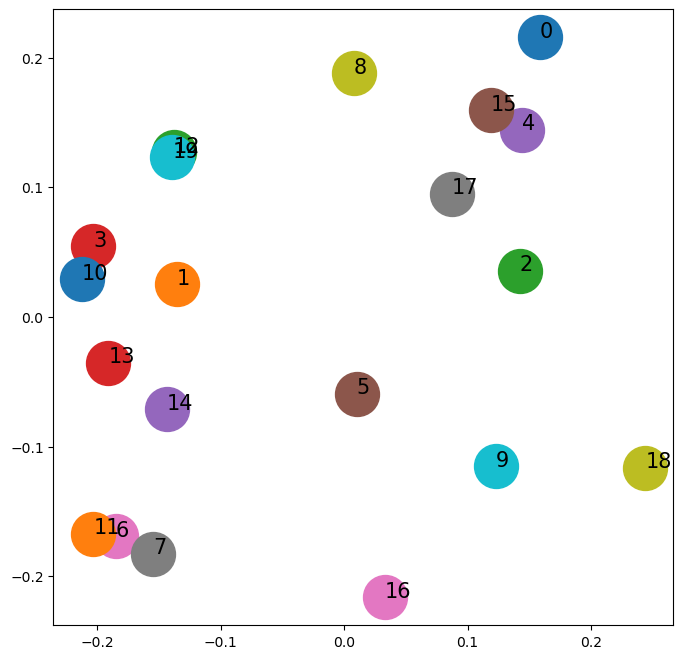

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(8,8))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=15)

---

### Summary

| Algorithm   | Level       | Output          | Example Use Case             |
|-------------|-------------|------------------|-------------------------------|
| Node2Vec    | Node-level  | Vector per node  | User classification           |
| Edge2Vec    | Edge-level  | Vector per edge  | Link prediction, fraud detection |
| Graph2Vec   | Graph-level | Vector per graph | Molecule classification       |